# Image processing tutorial

## Setup

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import ndimage

%matplotlib nbagg

## Open the file

In [3]:
!ls

coffee.JPG  coins.JPG  Tutorial_Image_Processing.ipynb


<IPython.core.display.Javascript object>


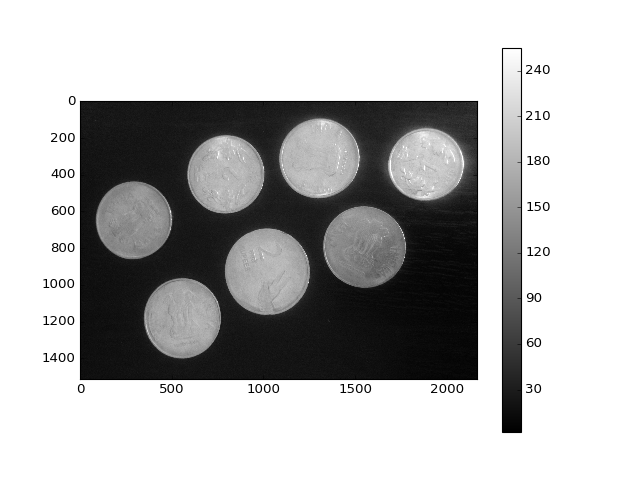

In [4]:
im = Image.open('coins.JPG')
channels = im.split()
r = np.array(channels[0])

fig = plt.figure("Red Channel")
plt.imshow(r, origin = "upper", cmap = cm.gray)
plt.colorbar()
plt.show()

## Plot the histogram

<IPython.core.display.Javascript object>


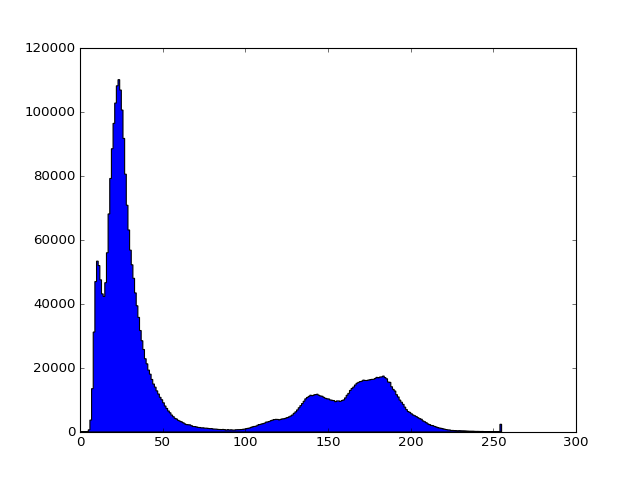

In [12]:
fig = plt.figure("Histogram")
plt.hist(r.flatten(), bins=np.arange(256), histtype = "stepfilled")
plt.show()

## Thresholding

<IPython.core.display.Javascript object>


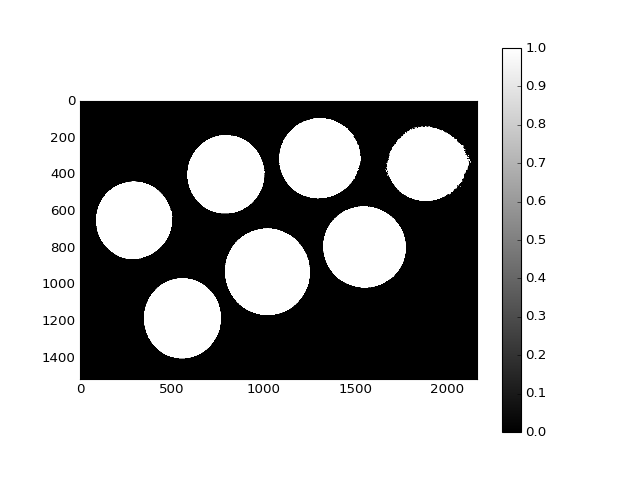

In [13]:
seuil = 80
ims = r > seuil
binaire = np.where(ims,1,0)

fig = plt.figure("Thresholding")
plt.imshow(binaire, origin = "upper", cmap = cm.gray)
plt.colorbar()
plt.show()

## Erosion + Labeling

In [16]:
erod = ndimage.morphology.binary_erosion(binaire, structure=np.ones((10,10)))
lab, number = ndimage.measurements.label(erod) # On compte les zones

<IPython.core.display.Javascript object>


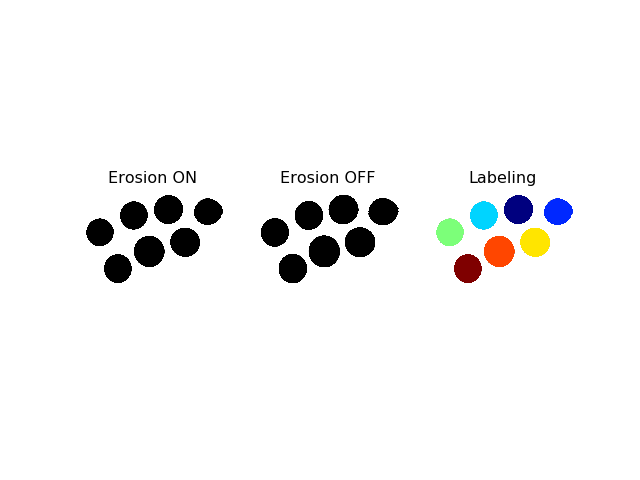

7


In [25]:
fig = plt.figure("Erosion effect")
ax = fig.add_subplot(1, 3, 1)
ax.axis("off")
plt.title("Erosion ON")
plt.imshow(erod, origin = "upper", cmap = cm.binary)
ax = fig.add_subplot(1, 3, 2)
ax.axis("off")
plt.title("Erosion OFF")
plt.imshow(binaire, origin = "upper", cmap = cm.binary)
ax = fig.add_subplot(1, 3, 3)
ax.axis("off")
plt.title("Labeling")
plt.imshow(np.where(lab,lab,np.nan), origin = "upper", cmap = cm.jet)
#plt.colorbar()
plt.show()

print(number)

In [29]:
fig = plt.figure("Labeling")
plt.title("Nombre de grains")
plt.imshow(np.where(lab,lab,np.nan), origin = "upper", cmap = cm.inferno)
plt.colorbar()
plt.show()

## Sobel filter

<IPython.core.display.Javascript object>


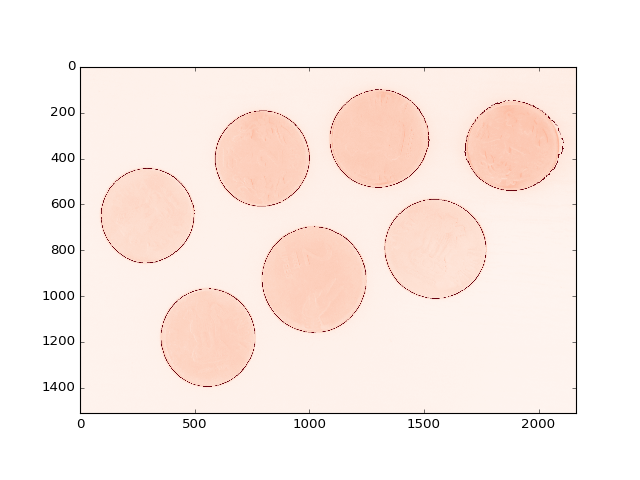

In [30]:
sobx = ndimage.sobel(erod, axis=0, mode='constant')
soby = ndimage.sobel(erod, axis=1, mode='constant')
sob = np.hypot(sobx, soby)
bins = 1000

fig = plt.figure("Sobel–Feldman operator")
plt.imshow(np.where(sob > 0 , bins, r), origin = "upper",cmap = cm.Reds)
plt.show()

## Localization of centers

<IPython.core.display.Javascript object>


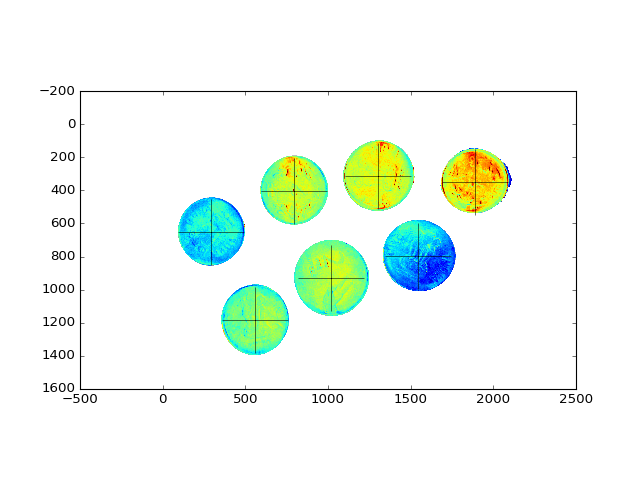

In [61]:
fig = plt.figure("Centers")
plt.imshow(np.where(erod == 1, r, np.nan), origin = "upper")
ax = fig.add_subplot(1,1,1)
#ax.axis("off")
for i in range(1,np.max(number)+1):
    x,y= np.nonzero(np.where(lab==i,1,0))
    xmean=x.mean()
    ymean=y.mean()
    plt.plot(ymean,xmean,"k+-", markersize=60)

plt.show()

<IPython.core.display.Javascript object>


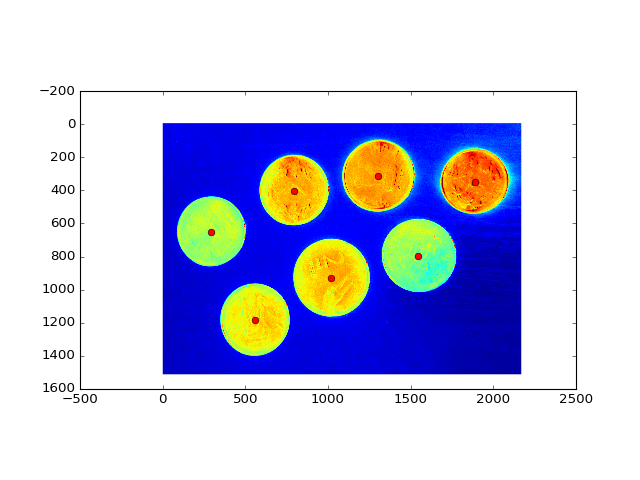

In [53]:
fig = plt.figure()
plt.imshow(r, origin = "upper")

centers = []
for l in np.arange(1, number+1):
        y, x = np.where(lab == l)
        centers.append([x.mean(), y.mean()])
centers = np.array(centers).T   
plt.plot(centers[0], centers[1], "or")
plt.show()

In [51]:
np.unique(lab)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)